# Video Dataset Transformation  

In this notebook, we show examples of video dataset transformation

In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import os
import time
import sys

import decord
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import torch
import torch.cuda as cuda
import torch.nn as nn
import torchvision

from vu.data import show_batch, VideoDataset
from vu.models.r2plus1d import DEFAULT_MEAN, DEFAULT_STD
from vu.utils import system_info
from vu.utils.functional_video import denormalize
from vu.utils.transforms_video import (
    CenterCropVideo,    
    NormalizeVideo,
    RandomCropVideo,
    RandomHorizontalFlipVideo,
    RandomResizedCropVideo,
    ResizeVideo,
    ToTensorVideo,
)

system_info()

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0] 

PyTorch 1.3.0 

Torch-vision 0.4.1a0+d94043a 

Available devices:
0: Tesla V100-PCIE-16GB
1: Tesla V100-PCIE-16GB
2: Tesla V100-PCIE-16GB
3: Tesla V100-PCIE-16GB


In [3]:
def show_clip(clip, size_factor=600):
    """Show frames in a clip"""
    if isinstance(clip, torch.Tensor):
        # Convert [C, T, H, W] tensor to [T, H, W, C] numpy array 
        clip = np.moveaxis(clip.numpy(), 0, -1)
    
    figsize = np.array([clip[0].shape[1]*len(clip), clip[0].shape[0]]) / size_factor
    plt.tight_layout()
    fig, axs = plt.subplots(1, len(clip), figsize=figsize)
    for i, f in enumerate(clip):
        axs[i].axis("off")
        axs[i].imshow(f)

## Prepare a Sample Video
A sample video and label paths:

In [4]:
VIDEO_PATH = os.path.join("data", "samples", "drinking.mp4")
LABEL_PATH = os.path.join("data", "samples", "label.txt")

In [5]:
video_reader = decord.VideoReader(VIDEO_PATH)
video_length = len(video_reader)
print("Video length = {} frames".format(video_length))

Video length = 152 frames


We use three frames (the first, middle, and the last) to quickly visualize video transformations.

<Figure size 432x288 with 0 Axes>

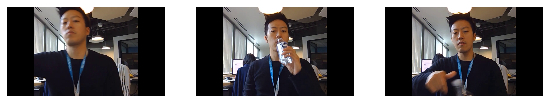

In [6]:
clip = [
    video_reader[0].asnumpy(),
    video_reader[video_length//2].asnumpy(),
    video_reader[video_length-1].asnumpy(),
]
show_clip(clip)

In [7]:
# [T, H, W, C] numpy array to [C, T, H, W] tensor
t_clip = ToTensorVideo()(torch.from_numpy(np.array(clip)))
t_clip.shape

torch.Size([3, 3, 1080, 1920])

## Video Transformations

Resizing with the original ratio

<Figure size 432x288 with 0 Axes>

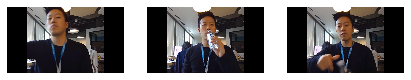

In [8]:
show_clip(ResizeVideo(size=800)(t_clip))

Resizing

<Figure size 432x288 with 0 Axes>

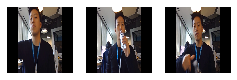

In [9]:
show_clip(ResizeVideo(size=800, keep_ratio=False)(t_clip))

Center cropping

<Figure size 432x288 with 0 Axes>

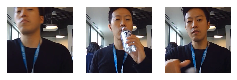

In [11]:
show_clip(CenterCropVideo(size=800)(t_clip))

Random cropping

<Figure size 432x288 with 0 Axes>

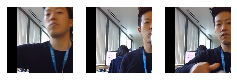

In [13]:
random_crop = RandomCropVideo(size=800)
show_clip(random_crop(t_clip))

<Figure size 432x288 with 0 Axes>

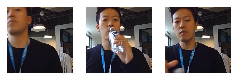

In [14]:
show_clip(random_crop(t_clip))

Random resized cropping

/data/anaconda/envs/r2p1d/lib/python3.6/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


<Figure size 432x288 with 0 Axes>

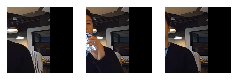

In [15]:
random_resized_crop = RandomResizedCropVideo(size=800)
show_clip(random_resized_crop(t_clip))

<Figure size 432x288 with 0 Axes>

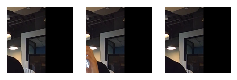

In [16]:
show_clip(random_resized_crop(t_clip))

Normalizing (and denormalizing to verify)

WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

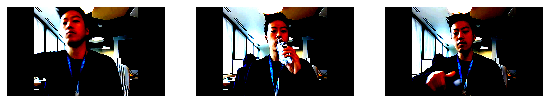

In [19]:
norm_t_clip = NormalizeVideo(mean=DEFAULT_MEAN, std=DEFAULT_STD)(t_clip)
show_clip(norm_t_clip)

<Figure size 432x288 with 0 Axes>

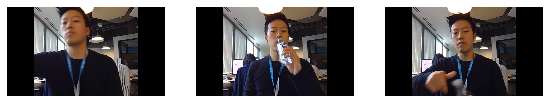

In [23]:
show_clip(denormalize(norm_t_clip, mean=DEFAULT_MEAN, std=DEFAULT_STD))

Horizontal flipping

<Figure size 432x288 with 0 Axes>

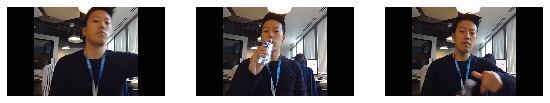

In [25]:
show_clip(RandomHorizontalFlipVideo(p=1.0)(t_clip))